In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [2]:
file = "/Users/danichao/Documents/TimeSeriesData/LD2011_2014.txt"
data = pd.read_csv(file, sep = ';', index_col=0)

/var/folders/jm/qwj9nn7n7b9d2k2btd095nzm0000gn/T/ipykernel_82704/2294715028.py:2: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,125,126,127,128,129,130,131,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,157,160,164,165,167,170,173,177,178,179,181,184,185,186,223,224,255,280,289,305,308,322,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,363,364,365,366,367,368,369,370) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file, sep = ';', index_col=0)


## Data Preparation

In [3]:
data_2012 = data[(data.index > '2012-01-01 00:00:00') & (data.index < '2013-01-01 00:00:00')]

In [4]:
data_2012 = data_2012.loc[:, (data_2012 != 0).any(axis=0)] # remove users without data during 2012

In [5]:
data_2012

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
2012-01-01 00:15:00,"3,80710659898477","22,7596017069701","77,3240660295395","136,178861788618","70,7317073170732","351,190476190476","9,60994912379876","279,461279461279","75,1748251748252","87,0967741935484",...,"128,47965738758",28500.0,"1729,95780590717","1704,54545454545","15,645371577575","12,8730251609128","504,828797190518","63,4390651085142","761,730205278592",0
2012-01-01 00:30:00,"5,0761421319797","22,7596017069701","77,3240660295395","136,178861788618","73,1707317073171","354,166666666667","9,04465799886942","279,461279461279","73,4265734265734","84,9462365591398",...,"127,765881513205",26400.0,"1654,00843881857","1659,09090909091","15,645371577575","13,458162668227","525,021949078139","60,1001669449082","702,346041055718",0
2012-01-01 00:45:00,"3,80710659898477","22,7596017069701","77,3240660295395","140,243902439024","69,5121951219512","348,214285714286","8,47936687394008","279,461279461279","75,1748251748252","91,3978494623656",...,"114,204139900071",25200.0,"1333,33333333333","1636,36363636364","15,645371577575","10,5324751316559","526,777875329236","56,7612687813022","696,480938416422",0
2012-01-01 01:00:00,"3,80710659898477","22,7596017069701","77,3240660295395","140,243902439024","75,609756097561","339,285714285714","7,3487846240814","279,461279461279","68,1818181818182","88,1720430107527",...,"112,062812276945",23800.0,"1324,89451476793","1636,36363636364","15,645371577575","14,6284376828555","539,947322212467","63,4390651085142","693,548387096774",0
2012-01-01 01:15:00,"5,0761421319797","22,0483641536273","77,3240660295395","146,341463414634","73,1707317073171","342,261904761905","6,78349349915206","265,993265993266","69,9300699300699","86,0215053763441",...,"112,77658815132",23700.0,"1118,14345991561","1659,09090909091","15,645371577575","9,94733762434172","556,628621597893","68,4474123539232","723,607038123167",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 22:45:00,"1,26903553299492","24,8933143669986","3,47523892267593","148,373983739837","64,6341463414634","285,714285714286","5,08762012436405","269,360269360269","73,4265734265734","67,741935483871",...,"202,712348322627",33200.0,"1042,194092827",1250,"18,2529335071708","5,26623756582797","696,22475856014","90,1502504173623","786,656891495601",0
2012-12-31 23:00:00,"2,53807106598985","24,1820768136558","3,47523892267593","146,341463414634","65,8536585365854","279,761904761905","5,65291124929339","249,158249158249","71,6783216783217","76,3440860215054",...,"190,578158458244",28200.0,"1037,9746835443","1159,09090909091","16,9491525423729","5,26623756582797","659,350307287094","90,1502504173623","832,844574780059",0
2012-12-31 23:15:00,"2,53807106598985","23,4708392603129","3,47523892267593","140,243902439024","68,2926829268293","276,785714285714","4,52232899943471","235,690235690236","69,9300699300699","74,1935483870968",...,"169,164882226981",24900.0,"1004,2194092827","1113,63636363636","18,2529335071708","6,43651258045641","599,648814749781","90,1502504173623","815,24926686217",0
2012-12-31 23:30:00,"1,26903553299492","24,1820768136558","4,34404865334492","136,178861788618","67,0731707317073","270,833333333333","5,08762012436405","245,791245791246","73,4265734265734","76,3440860215054",...,"138,472519628837",23800.0,"987,341772151899","1159,09090909091","16,9491525423729","5,26623756582797","640,913081650571","83,4724540901503","788,123167155425",0


In [6]:
def convert_data(data_arr):
    new = []

    for num in data_arr:
        if num != 0:
            temp = float(num.replace(',', '.'))
        else:
            temp = num
        new.append(temp)
        
    return np.array(new)

In [7]:
i=0
while i < 336:
    temp = convert_data(data_2012.iloc[:, i].array[:])
    data_2012.iloc[:, i].array[:] = temp
    
    i+=1

AttributeError: 'numpy.float64' object has no attribute 'replace'

In [8]:
i

327

In [9]:
i=328
while i < 336:
    temp = convert_data(data_2012.iloc[:, i].array[:])
    data_2012.iloc[:, i].array[:] = temp
    
    i+=1

In [10]:
data_2012

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
2012-01-01 00:15:00,3.807107,22.759602,77.324066,136.178862,70.731707,351.190476,9.609949,279.461279,75.174825,87.096774,...,128.479657,28500.0,1729.957806,1704.545455,15.645372,12.873025,504.828797,63.439065,761.730205,0.0
2012-01-01 00:30:00,5.076142,22.759602,77.324066,136.178862,73.170732,354.166667,9.044658,279.461279,73.426573,84.946237,...,127.765882,26400.0,1654.008439,1659.090909,15.645372,13.458163,525.021949,60.100167,702.346041,0.0
2012-01-01 00:45:00,3.807107,22.759602,77.324066,140.243902,69.512195,348.214286,8.479367,279.461279,75.174825,91.397849,...,114.20414,25200.0,1333.333333,1636.363636,15.645372,10.532475,526.777875,56.761269,696.480938,0.0
2012-01-01 01:00:00,3.807107,22.759602,77.324066,140.243902,75.609756,339.285714,7.348785,279.461279,68.181818,88.172043,...,112.062812,23800.0,1324.894515,1636.363636,15.645372,14.628438,539.947322,63.439065,693.548387,0.0
2012-01-01 01:15:00,5.076142,22.048364,77.324066,146.341463,73.170732,342.261905,6.783493,265.993266,69.93007,86.021505,...,112.776588,23700.0,1118.14346,1659.090909,15.645372,9.947338,556.628622,68.447412,723.607038,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 22:45:00,1.269036,24.893314,3.475239,148.373984,64.634146,285.714286,5.08762,269.360269,73.426573,67.741935,...,202.712348,33200.0,1042.194093,1250.0,18.252934,5.266238,696.224759,90.15025,786.656891,0.0
2012-12-31 23:00:00,2.538071,24.182077,3.475239,146.341463,65.853659,279.761905,5.652911,249.158249,71.678322,76.344086,...,190.578158,28200.0,1037.974684,1159.090909,16.949153,5.266238,659.350307,90.15025,832.844575,0.0
2012-12-31 23:15:00,2.538071,23.470839,3.475239,140.243902,68.292683,276.785714,4.522329,235.690236,69.93007,74.193548,...,169.164882,24900.0,1004.219409,1113.636364,18.252934,6.436513,599.648815,90.15025,815.249267,0.0
2012-12-31 23:30:00,1.269036,24.182077,4.344049,136.178862,67.073171,270.833333,5.08762,245.791246,73.426573,76.344086,...,138.47252,23800.0,987.341772,1159.090909,16.949153,5.266238,640.913082,83.472454,788.123167,0.0


In [11]:
data_2012 = data_2012.loc[:, (data_2012 != 0).any(axis=0)]

In [12]:
data_2012

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_360,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369
2012-01-01 00:15:00,3.807107,22.759602,77.324066,136.178862,70.731707,351.190476,9.609949,279.461279,75.174825,87.096774,...,223.684211,128.479657,28500.0,1729.957806,1704.545455,15.645372,12.873025,504.828797,63.439065,761.730205
2012-01-01 00:30:00,5.076142,22.759602,77.324066,136.178862,73.170732,354.166667,9.044658,279.461279,73.426573,84.946237,...,236.842105,127.765882,26400.0,1654.008439,1659.090909,15.645372,13.458163,525.021949,60.100167,702.346041
2012-01-01 00:45:00,3.807107,22.759602,77.324066,140.243902,69.512195,348.214286,8.479367,279.461279,75.174825,91.397849,...,214.912281,114.20414,25200.0,1333.333333,1636.363636,15.645372,10.532475,526.777875,56.761269,696.480938
2012-01-01 01:00:00,3.807107,22.759602,77.324066,140.243902,75.609756,339.285714,7.348785,279.461279,68.181818,88.172043,...,200.657895,112.062812,23800.0,1324.894515,1636.363636,15.645372,14.628438,539.947322,63.439065,693.548387
2012-01-01 01:15:00,5.076142,22.048364,77.324066,146.341463,73.170732,342.261905,6.783493,265.993266,69.93007,86.021505,...,199.561404,112.776588,23700.0,1118.14346,1659.090909,15.645372,9.947338,556.628622,68.447412,723.607038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 22:45:00,1.269036,24.893314,3.475239,148.373984,64.634146,285.714286,5.08762,269.360269,73.426573,67.741935,...,256.578947,202.712348,33200.0,1042.194093,1250.0,18.252934,5.266238,696.224759,90.15025,786.656891
2012-12-31 23:00:00,2.538071,24.182077,3.475239,146.341463,65.853659,279.761905,5.652911,249.158249,71.678322,76.344086,...,245.614035,190.578158,28200.0,1037.974684,1159.090909,16.949153,5.266238,659.350307,90.15025,832.844575
2012-12-31 23:15:00,2.538071,23.470839,3.475239,140.243902,68.292683,276.785714,4.522329,235.690236,69.93007,74.193548,...,233.552632,169.164882,24900.0,1004.219409,1113.636364,18.252934,6.436513,599.648815,90.15025,815.249267
2012-12-31 23:30:00,1.269036,24.182077,4.344049,136.178862,67.073171,270.833333,5.08762,245.791246,73.426573,76.344086,...,219.298246,138.47252,23800.0,987.341772,1159.090909,16.949153,5.266238,640.913082,83.472454,788.123167


In [43]:
# Set the index to timestamp format
data_2012['time_date'] = pd.to_datetime(data_2012.index, utc=True)
data_2012.set_index('time_date', inplace=True)

In [44]:
# Include day-of-week and hour information for the "group by" later
data_2012['weekday'] = data_2012.index.dayofweek
data_2012['hour'] = data_2012.index.hour
data_2012['month'] = data_2012.index.month

In [45]:
data_2012

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,weekday,hour,month
time_date,,,,,,,,,,,,,,,,,,,,,
2012-01-01 00:15:00+00:00,3.807107,22.759602,77.324066,136.178862,70.731707,351.190476,9.609949,279.461279,75.174825,87.096774,...,1729.957806,1704.545455,15.645372,12.873025,504.828797,63.439065,761.730205,6,0,1
2012-01-01 00:30:00+00:00,5.076142,22.759602,77.324066,136.178862,73.170732,354.166667,9.044658,279.461279,73.426573,84.946237,...,1654.008439,1659.090909,15.645372,13.458163,525.021949,60.100167,702.346041,6,0,1
2012-01-01 00:45:00+00:00,3.807107,22.759602,77.324066,140.243902,69.512195,348.214286,8.479367,279.461279,75.174825,91.397849,...,1333.333333,1636.363636,15.645372,10.532475,526.777875,56.761269,696.480938,6,0,1
2012-01-01 01:00:00+00:00,3.807107,22.759602,77.324066,140.243902,75.609756,339.285714,7.348785,279.461279,68.181818,88.172043,...,1324.894515,1636.363636,15.645372,14.628438,539.947322,63.439065,693.548387,6,1,1
2012-01-01 01:15:00+00:00,5.076142,22.048364,77.324066,146.341463,73.170732,342.261905,6.783493,265.993266,69.93007,86.021505,...,1118.14346,1659.090909,15.645372,9.947338,556.628622,68.447412,723.607038,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 22:45:00+00:00,1.269036,24.893314,3.475239,148.373984,64.634146,285.714286,5.08762,269.360269,73.426573,67.741935,...,1042.194093,1250.0,18.252934,5.266238,696.224759,90.15025,786.656891,0,22,12
2012-12-31 23:00:00+00:00,2.538071,24.182077,3.475239,146.341463,65.853659,279.761905,5.652911,249.158249,71.678322,76.344086,...,1037.974684,1159.090909,16.949153,5.266238,659.350307,90.15025,832.844575,0,23,12
2012-12-31 23:15:00+00:00,2.538071,23.470839,3.475239,140.243902,68.292683,276.785714,4.522329,235.690236,69.93007,74.193548,...,1004.219409,1113.636364,18.252934,6.436513,599.648815,90.15025,815.249267,0,23,12


In [48]:
data_2012.iloc[:, 332]

time_date
2012-01-01 00:15:00+00:00    761.730205
2012-01-01 00:30:00+00:00    702.346041
2012-01-01 00:45:00+00:00    696.480938
2012-01-01 01:00:00+00:00    693.548387
2012-01-01 01:15:00+00:00    723.607038
                                ...    
2012-12-31 22:45:00+00:00    786.656891
2012-12-31 23:00:00+00:00    832.844575
2012-12-31 23:15:00+00:00    815.249267
2012-12-31 23:30:00+00:00    788.123167
2012-12-31 23:45:00+00:00    763.196481
Name: MT_369, Length: 35135, dtype: object

In [82]:
weekday_avg = np.array([[0.] *7] *333)
hour_avg = np.array([[0.] *24] *333)
month_avg = np.array([[0.] *12] *333)

In [84]:
i=0

while i < 333:
    weekday_avg[i, :] = np.array(data_2012.iloc[:, i].groupby(data_2012['weekday']).mean().array)
    hour_avg[i, :] = np.array(data_2012.iloc[:, i].groupby(data_2012['hour']).mean().array)
    month_avg[i, :] = np.array(data_2012.iloc[:, i].groupby(data_2012['month']).mean().array)
    i+=1

In [85]:
temp = np.concatenate([weekday_avg, hour_avg], axis=1)
features = np.concatenate([temp, month_avg], axis=1)

In [86]:
np.shape(features)

(333, 43)

In [87]:
features

array([[  5.52559222,   5.69540707,   5.64558115, ...,   2.0724169 ,
          2.02737239,   2.43743518],
       [ 26.76674316,  27.0405622 ,  26.31778413, ...,  27.07793213,
         26.37382448,  27.40678391],
       [  8.23371392,   6.89113007,   7.0683032 , ...,   2.41258186,
          3.44597693,   3.84016236],
       ...,
       [584.66994937, 614.81777341, 610.14673522, ..., 589.96378402,
        568.72744123, 561.45004343],
       [136.06141263, 161.4188712 , 159.10799516, ..., 130.66019531,
        129.68605083, 125.00729262],
       [853.38727545, 899.10822125, 895.17171756, ..., 817.19518612,
        764.11137586, 774.01100298]])

In [88]:
kmeans_model = KMeans(init='random', n_clusters=4, n_init=10, max_iter=300)

In [89]:
kmeans_model.fit(features)

KMeans(init='random', n_clusters=4)

In [90]:
kmeans_model.inertia_

4680205670.486821

In [92]:
kmeans_model.cluster_centers_

array([[  232.03864646,   235.1502926 ,   235.90428035,   235.81756056,
          238.20729809,   236.10808409,   226.33984291,   166.79136288,
          149.51990446,   141.38057979,   134.3750428 ,   132.58482504,
          139.78271898,   163.93108495,   187.15117142,   200.62844357,
          239.89645316,   270.41833611,   284.59880008,   289.58498908,
          288.41896767,   288.42565008,   289.99244018,   292.39640791,
          297.1444189 ,   304.09938315,   306.66282553,   300.74092395,
          287.48299196,   257.81239514,   206.8481098 ,   229.40884578,
          227.63924849,   222.42027398,   215.00333705,   230.85112152,
          243.31967996,   254.41729818,   256.88953605,   253.80612827,
          228.73066772,   220.22906768,   227.07445438],
       [ 2783.15445535,  2817.57678784,  2829.42315207,  2827.68601972,
         2851.9643063 ,  2823.65473866,  2721.8704414 ,  2071.94871506,
         1720.38275734,  1658.78809705,  1587.32541971,  1576.84822674,
       

In [93]:
kmeans_model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

<BarContainer object of 24 artists>

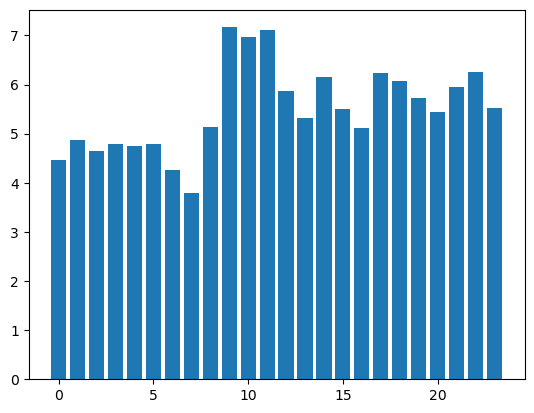

In [97]:
fig = plt.figure()
plt.bar(np.arange(24), hour_avg[0, :])

<BarContainer object of 24 artists>

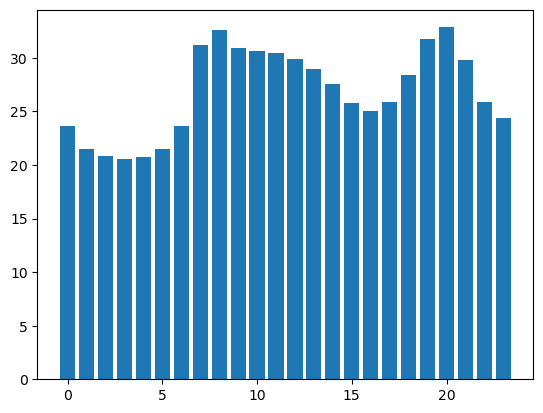

In [98]:
fig = plt.figure()
plt.bar(np.arange(24), hour_avg[1, :])

<BarContainer object of 24 artists>

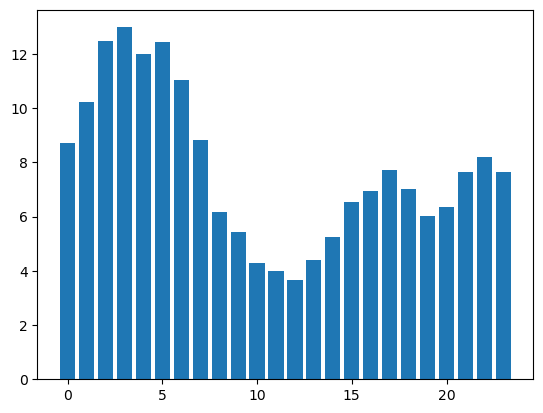

In [99]:
fig = plt.figure()
plt.bar(np.arange(24), hour_avg[2, :])

In [100]:
from sklearn.preprocessing import StandardScaler

In [101]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [103]:
kmeans_model_scaled = KMeans(init='random', n_clusters=4, n_init=10, max_iter=300)

In [104]:
kmeans_model_scaled.fit(scaled_features)

KMeans(init='random', n_clusters=4)

In [106]:
kmeans_model_scaled.inertia_

511.74922048078275

In [108]:
kmeans_model_scaled.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [112]:
np.where(kmeans_model_scaled.labels_ ==3)

(array([124, 133, 136, 138, 159, 162, 176, 184, 188, 195, 208, 243, 287,
        302, 308, 314, 320, 326, 327]),)

In [109]:
np.where(kmeans_model.labels_ ==1)

(array([124, 133, 136, 138, 159, 162, 176, 184, 188, 195, 208, 243, 287,
        302, 308, 314, 320, 326, 327]),)

<BarContainer object of 24 artists>

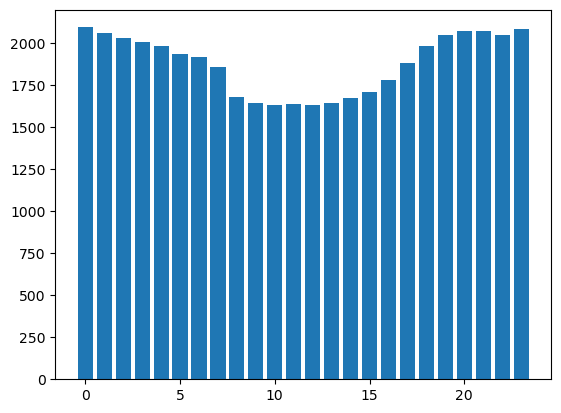

In [115]:
fig = plt.figure()
plt.bar(np.arange(24), hour_avg[136, :])

<BarContainer object of 24 artists>

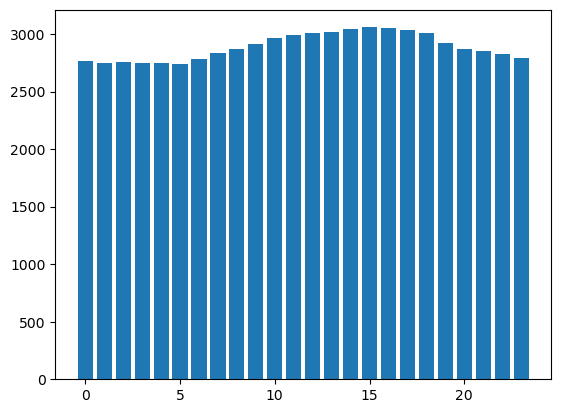

In [121]:
fig = plt.figure()
plt.bar(np.arange(24), hour_avg[124, :])

<BarContainer object of 24 artists>

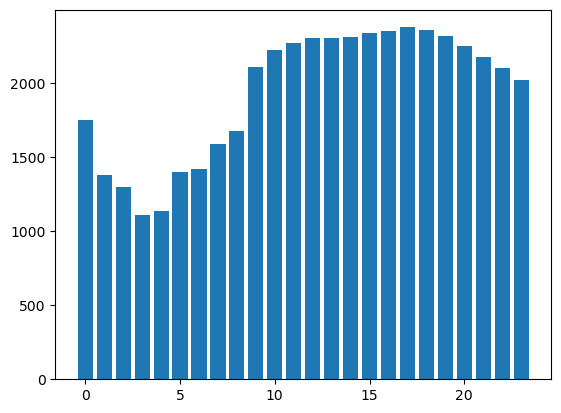

In [122]:
fig = plt.figure()
plt.bar(np.arange(24), hour_avg[159, :])

In [116]:
np.where(kmeans_model.labels_ ==2)

(array([164, 246]),)

In [117]:
np.where(kmeans_model_scaled.labels_ ==0)

(array([164, 246]),)

<BarContainer object of 24 artists>

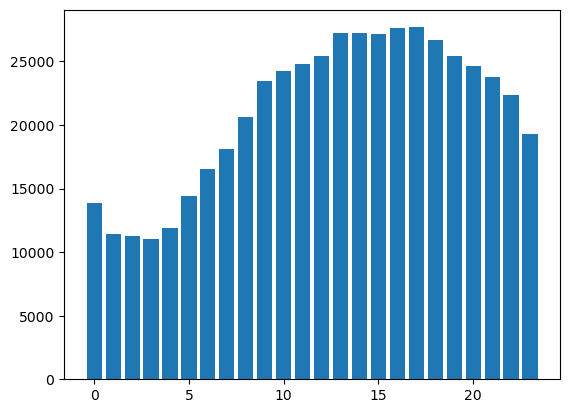

In [118]:
fig = plt.figure()
plt.bar(np.arange(24), hour_avg[164, :])

<BarContainer object of 24 artists>

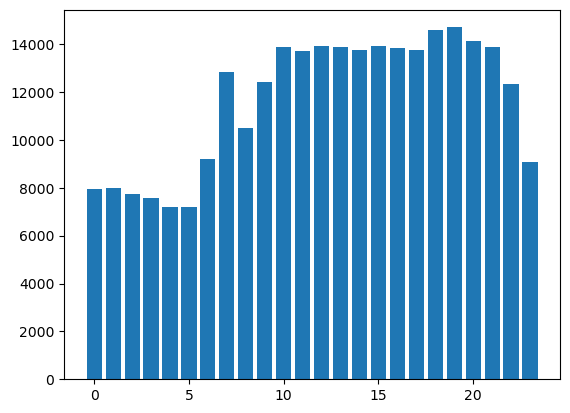

In [119]:
fig = plt.figure()
plt.bar(np.arange(24), hour_avg[246, :])

In [123]:
kmeans_model.n_iter_

15

In [124]:
kmeans_model_scaled.n_iter_

16

# Try different values for k

In [125]:
kmeans_kwargs = {
    'init': 'random',
    'n_init': 10,
    'max_iter': 300
}

In [127]:
sse = []
for k in range(4, 12):
    kmc_model = KMeans(n_clusters=k, **kmeans_kwargs)
    kmc_model.fit(scaled_features)
    sse.append(kmc_model.inertia_)

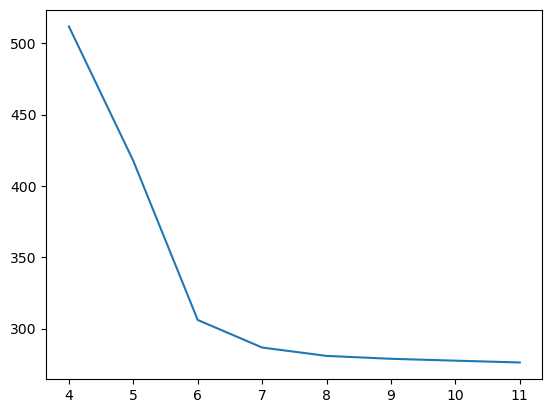

In [128]:
plt.plot(range(4, 12), sse)

In [130]:
from kneed import KneeLocator

In [131]:
kl = KneeLocator(range(4, 12), sse, curve="convex", direction="decreasing")


In [132]:
kl.elbow

6

In [133]:
kmeans_model_elbow_7 = KMeans(init='random', n_clusters=7, n_init=10, max_iter=300)

In [135]:
kmeans_model_elbow_7.fit(scaled_features)

KMeans(init='random', n_clusters=7)

In [136]:
kmeans_model_elbow_7.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 5,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 5, 1, 2, 5, 5, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 6, 2, 1, 1, 1, 1, 1, 1,
       1, 6, 1, 1, 6, 2, 6, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 6, 2, 2, 6, 2, 3, 1, 1, 2, 5, 2, 1, 2, 5, 2, 1, 5,
       4, 2, 5, 1, 2, 5, 2, 2, 6, 1, 5, 2, 6, 1, 5, 2, 2, 2, 2, 4, 5, 1,
       2, 1, 1, 1, 5, 1, 1, 2, 1, 2, 6, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 5, 1, 1, 1, 2, 2,
       1, 6, 1, 1, 3, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1,
       5, 2, 1, 1, 1, 1, 1, 1, 5, 1, 1, 2, 1, 2, 1, 5, 1, 2, 2, 1, 1, 1,
       1, 6, 2, 2, 1, 2, 5, 1, 1, 1, 1, 1, 1, 1, 1,

(array([  1., 232.,  56.,   2.,   2.,  25.,  15.]),
 array([0, 1, 2, 3, 4, 5, 6, 7]),
 <BarContainer object of 7 artists>)

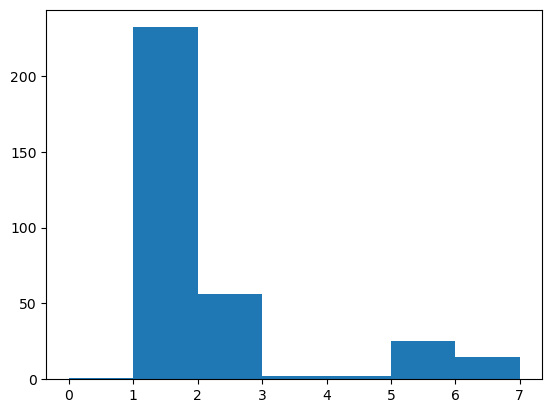

In [137]:
plt.hist(kmeans_model_elbow_7.labels_, bins=range(0,8))

In [138]:
np.where(kmeans_model_elbow_7.labels_ == 0)

(array([325]),)

Text(0.5, 1.0, 'label=0')

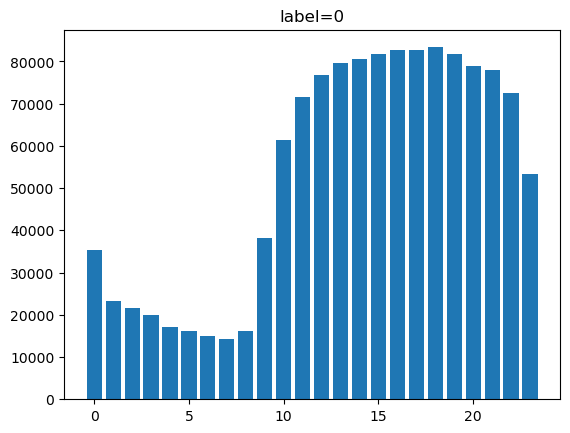

In [140]:
fig = plt.figure()
plt.bar(np.arange(24), hour_avg[325, :])
plt.title('label=0')

Text(0.5, 1.0, 'label=0')

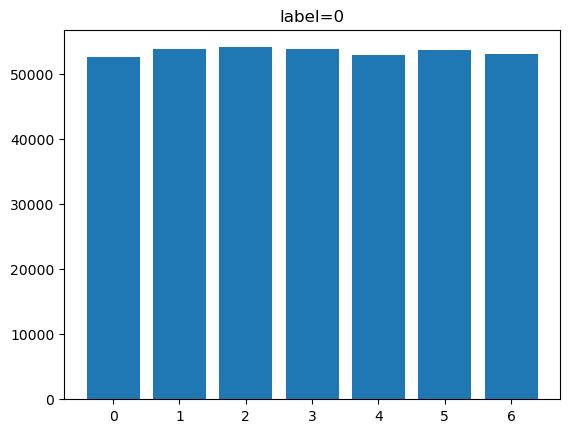

In [157]:
fig = plt.figure()
plt.bar(np.arange(7), weekday_avg[325, :])
plt.title('label=0')

Text(0.5, 1.0, 'label=1')

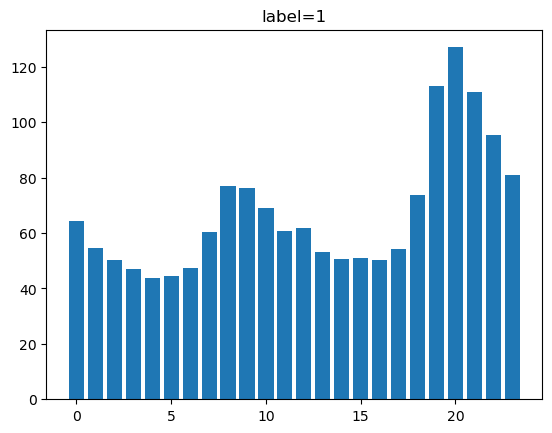

In [142]:
fig = plt.figure()
plt.bar(np.arange(24), hour_avg[47, :])
plt.title('label=1')

Text(0.5, 1.0, 'label=1')

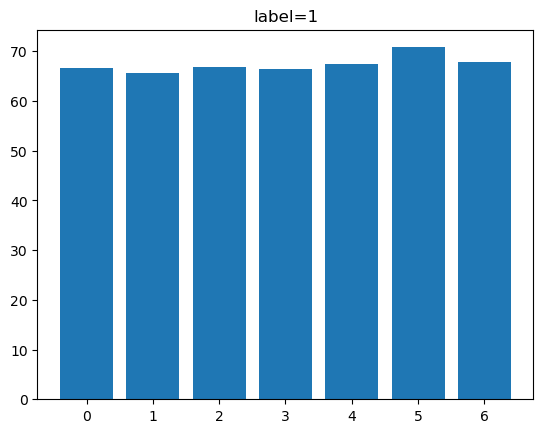

In [158]:
fig = plt.figure()
plt.bar(np.arange(7), weekday_avg[47, :])
plt.title('label=1')

Text(0.5, 1.0, 'label=2')

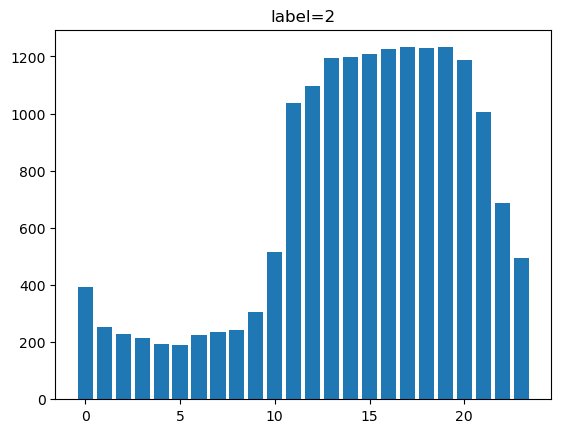

In [145]:
fig = plt.figure()
plt.bar(np.arange(24), hour_avg[91, :])
plt.title('label=2')

Text(0.5, 1.0, 'label=2')

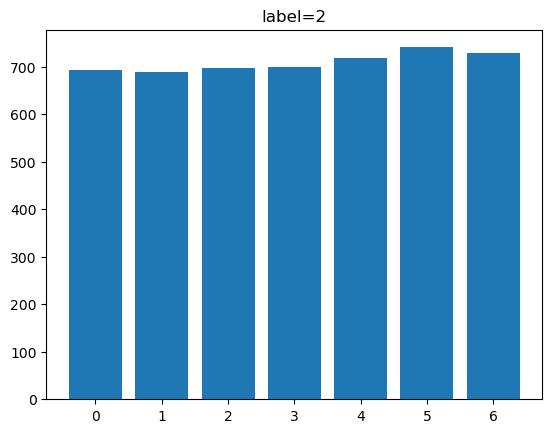

In [159]:
fig = plt.figure()
plt.bar(np.arange(7), weekday_avg[91, :])
plt.title('label=2')

Text(0.5, 1.0, 'label=3')

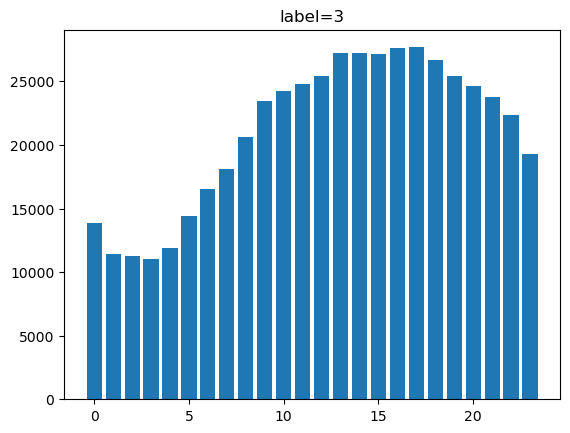

In [148]:
fig = plt.figure()
plt.bar(np.arange(24), hour_avg[164, :])
plt.title('label=3')

Text(0.5, 1.0, 'label=3')

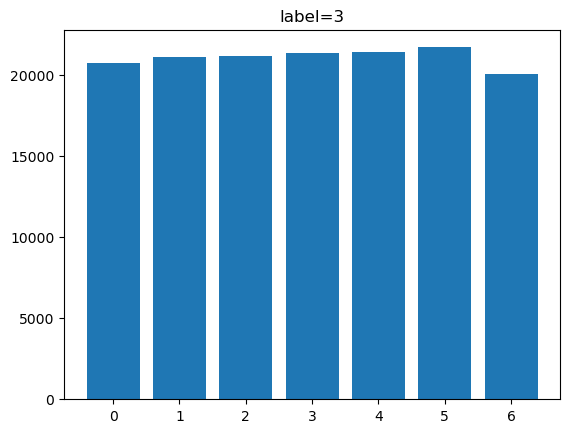

In [160]:
fig = plt.figure()
plt.bar(np.arange(7), weekday_avg[164, :])
plt.title('label=3')

Text(0.5, 1.0, 'label=3')

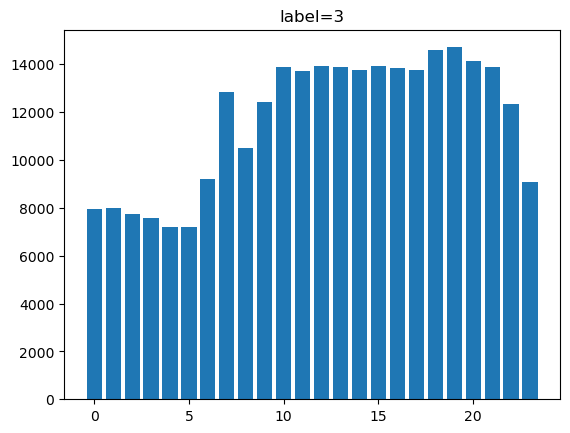

In [149]:
fig = plt.figure()
plt.bar(np.arange(24), hour_avg[246, :])
plt.title('label=3')

Text(0.5, 1.0, 'label=3')

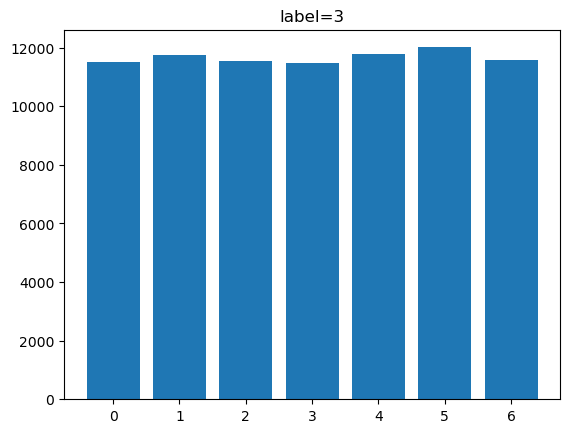

In [161]:
fig = plt.figure()
plt.bar(np.arange(7), weekday_avg[246, :])
plt.title('label=3')

Text(0.5, 1.0, 'label=4')

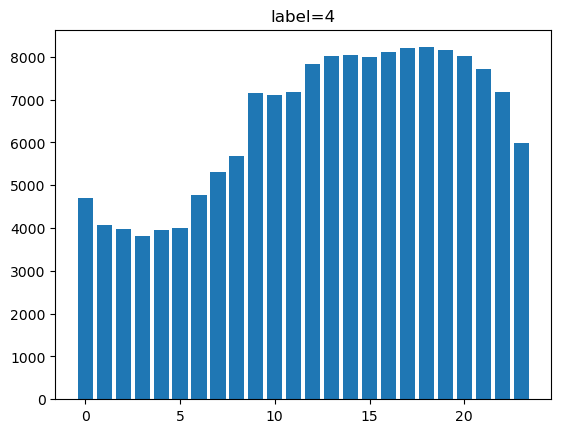

In [152]:
fig = plt.figure()
plt.bar(np.arange(24), hour_avg[176, :])
plt.title('label=4')

Text(0.5, 1.0, 'label=4')

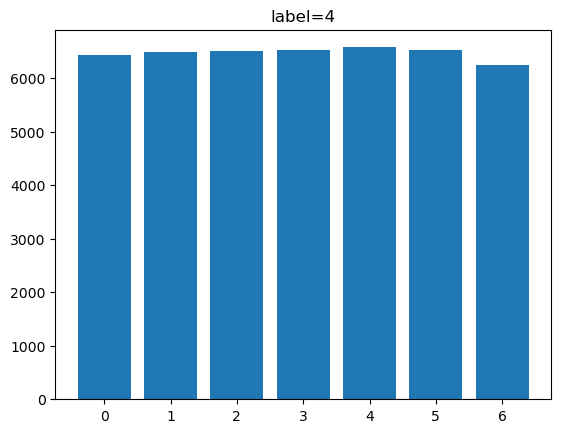

In [162]:
fig = plt.figure()
plt.bar(np.arange(7), weekday_avg[176, :])
plt.title('label=4')

Text(0.5, 1.0, 'label=4')

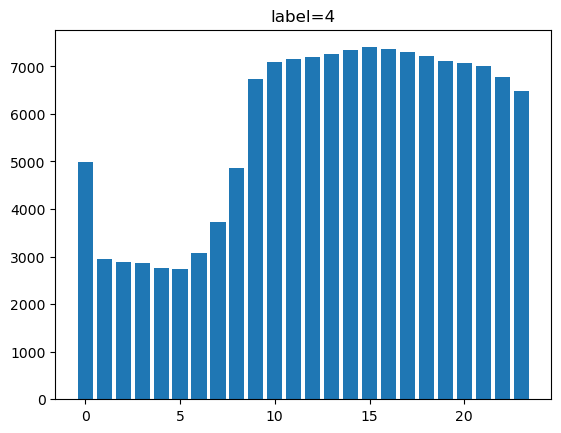

In [153]:
fig = plt.figure()
plt.bar(np.arange(24), hour_avg[195, :])
plt.title('label=4')

Text(0.5, 1.0, 'label=4')

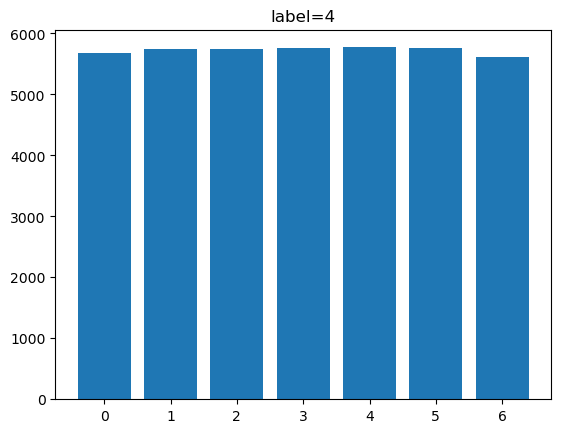

In [163]:
fig = plt.figure()
plt.bar(np.arange(7), weekday_avg[195, :])
plt.title('label=4')

Text(0.5, 1.0, 'label=5')

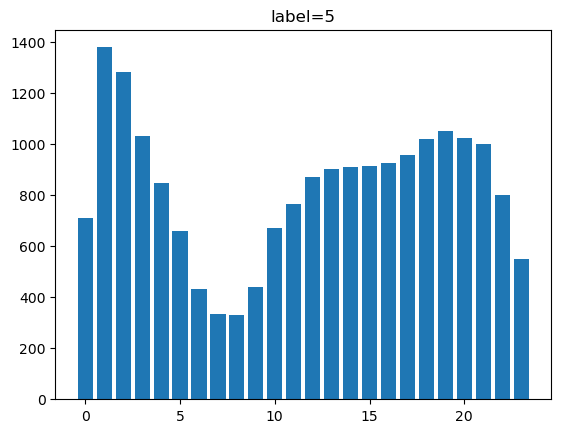

In [155]:
fig = plt.figure()
plt.bar(np.arange(24), hour_avg[95, :])
plt.title('label=5')

Text(0.5, 1.0, 'label=5')

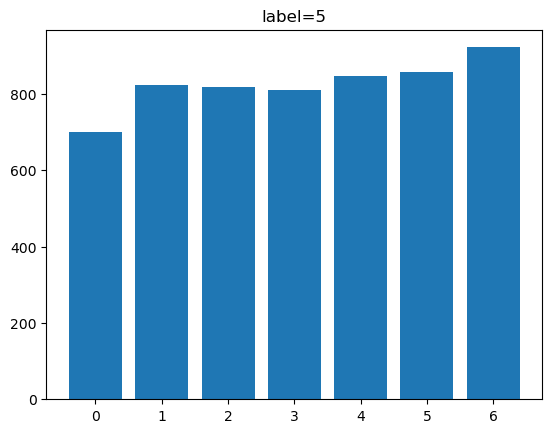

In [164]:
fig = plt.figure()
plt.bar(np.arange(7), weekday_avg[95, :])
plt.title('label=5')

Text(0.5, 1.0, 'label=5')

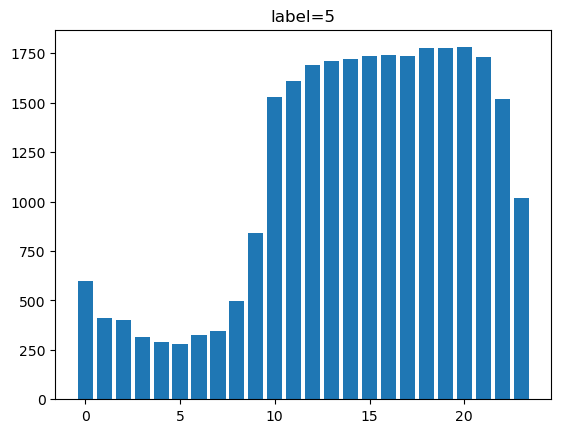

In [156]:
fig = plt.figure()
plt.bar(np.arange(24), hour_avg[96, :])
plt.title('label=5')

Text(0.5, 1.0, 'label=5')

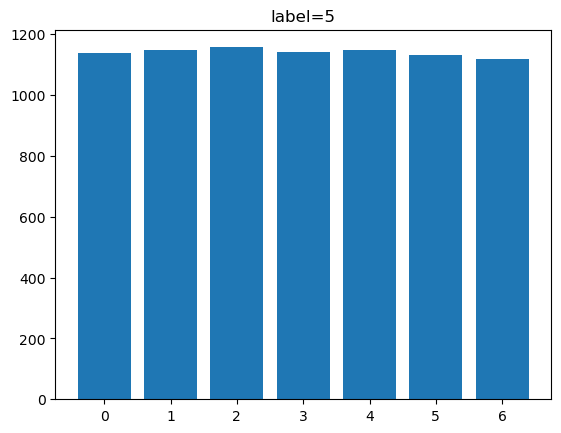

In [165]:
fig = plt.figure()
plt.bar(np.arange(7), weekday_avg[96, :])
plt.title('label=5')

In [166]:
np.where(kmeans_model_elbow_7.labels_ == 6)

(array([124, 133, 136, 138, 159, 162, 184, 188, 208, 243, 287, 302, 308,
        326, 327]),)

Text(0.5, 1.0, 'label=6')

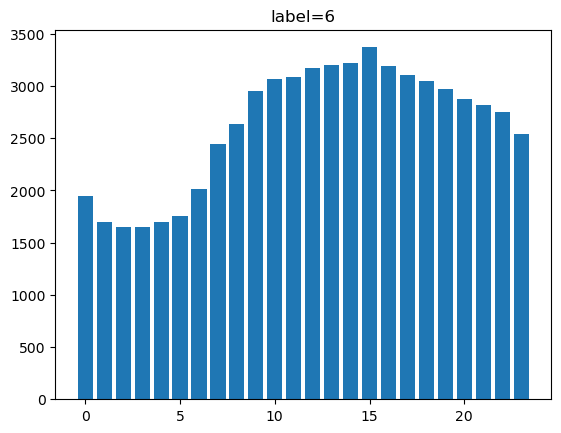

In [168]:
fig = plt.figure()
plt.bar(np.arange(24), hour_avg[162, :])
plt.title('label=6')

Text(0.5, 1.0, 'label=6')

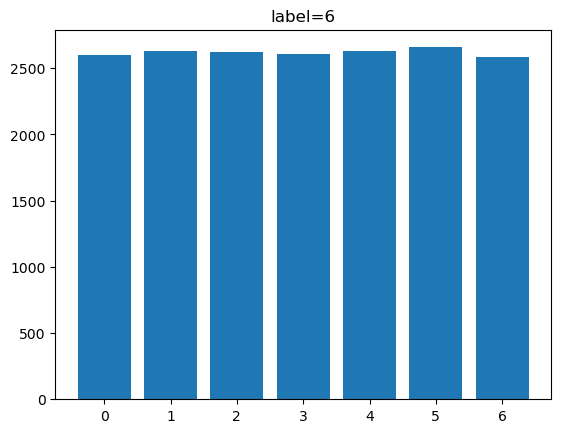

In [169]:
fig = plt.figure()
plt.bar(np.arange(7), weekday_avg[162, :])
plt.title('label=6')